<a href="https://colab.research.google.com/github/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Preparando ambiente para realizar a análise**

---
**Objetivo**


*  Conectar na plataforma Kaggle com o Google Colab.

---
**Passo a passo**

1.   Criar um token para utilzar a API do Kaggle, retornando um aquivo .json e realizar o upload desse arquivo para o colab.

  *   é um arquivo de configuração que contém minhas credênciais de API do Kaggle.
  *   essas credênciais permitem que você se autentique na API do Kaggle e faça downloads de datasets diretamente do Kaggle.

2.   Usa o comando ***'pip install kaggle -q'*** para instalar a biblioteca 'Kaggle', que é uma interface Python para a API do Kaggle.
  *   é o que permite o acesso aos datasets.
  *   o argumento '-q' é abreviação de "quiet", e faz com que o comando pip simplifique a saída de informações durante o processo de instalação.

3. É necessario criar uma pasta que armazene o arquivo kaggle.json para que seja possível realizar o acesso a API. Foi feito:

  *   Criação da pasta.
  *   Movimentação do arquivo .json para a pasta criada.
  *   Atribuir uma permissão para a pasta criada.
  *   Essa pasta não é visivel no painel de arquivos do Colab, mas ainda sim é manipulavel via comandos do sheel.
     * !ls -la ~/.kaggle (listar conteudo do diretório).


4. Agora será feito o dowload do dataset que sera trabalhado nessa análise.


5. Realizando o unzip no dataset encontrado.
  - /content/titanic

1.   Upload do kaggle.json

In [ ]:
from google.colab import files
uploaded = files.upload()

---

2.   Instalando a biblioteca Kaggle

In [2]:
pip install kaggle -q

---



3.   Criando a pasta

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -la ~/.kaggle

---


4.   Dowload do dataset

In [ ]:
%cd /content/

!kaggle competitions download titanic

---


5.   Realizando unzip

In [ ]:
!unzip titanic.zip -d titanic



---



# **Quem é mais provável sobreviver ao titanic ?**

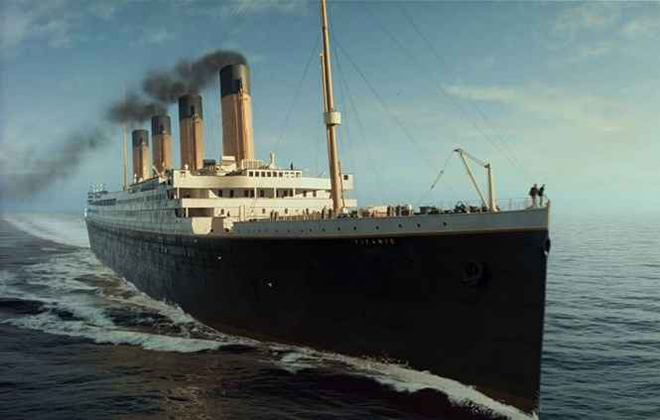

- O objetivo é usar  aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.
- O resultado é avaliado através da **Acurácia**.

- Descrição do dataset
  - **PassengerId**: Id do passageiro
  - **Survived**:  (0) - No,  (1) - Yes
  - **Pclass** (Ticket da classe): 1 = 1st, 2 = 2nd, 3 = 3rd
  - **Name**: Nome
  - **Sex**: Sexo
  - **Age**: Idade
  - **SibSp**: Quantidade de irmãos/cônjuges a bordo
  - **Parch**: Quantidade de pais/filhos a bordo
  - **Ticket**: Número do ticket
  - **Fare**: Tarifa de passageiros
  - **Cabin**: Número da cabine
  - **Embarked**: Porto aonde embarcou ( C = Cherbourg, Q = Queenstown, S = Southampton)
    

# Importando e fazendo o tratamento na base de dados

- Será replicado a mesma coisa feita na [**primeira**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e na [**segunda**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) parte dessa análise (para mais detalhes acesso esses links)

In [337]:
# Importando o pandas

import pandas as pd

In [338]:
# Visualizando a base de treino

treino = pd.read_csv('/content/titanic/train.csv')
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [339]:
# Visualizando a base de teste

teste = pd.read_csv('/content/titanic/test.csv')
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- Realizando os mesmos tratamentos iniciais feitos na [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e na [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb)

In [340]:
# Eliminando as colunas com elevada cardinalidade

treino = treino.drop(['Name','Ticket','Cabin'],axis=1)

teste = teste.drop(['Name','Ticket','Cabin'],axis=1)

In [341]:
# Usando a média para substituir valores nulos na coluna de idade

treino.loc[treino.Age.isnull(),'Age'] = treino.Age.mean()

teste.loc[teste.Age.isnull(),'Age'] = teste.Age.mean()

In [342]:
# Tratando a coluna Embarked da base de treino usando a moda

treino.loc[treino.Embarked.isnull(),'Embarked'] = treino.Embarked.mode()[0]

# Tratando a coluna Fare da base de teste usando a média

teste.loc[teste.Fare.isnull(),'Fare'] = teste.Fare.mean()

In [343]:
# Usando uma lambda function para fazer esse tratamento (na base de treino e na base de teste)

treino['MaleCheck'] = treino.Sex.apply(lambda x: 1 if x == 'male' else 0)
teste['MaleCheck'] = teste.Sex.apply(lambda x: 1 if x == 'male' else 0)

- Agora, para tratar a coluna Embarked irei usar o **[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)** que irá criar uma nova coluna para cada um dos rótulos da coluna original.

In [344]:
# Criando o encoder e fazendo o fit com os dados

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')
ohe = ohe.fit(treino[['Embarked']])

In [345]:
# Transformando os dados e atualizando a base de treino com os novos valores

ohe_df = pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())

treino = pd.concat([treino,ohe_df],axis=1)

- Agora iremos fazer o mesmo para a base de teste usando o encoder ohe que criamos acima.

In [346]:
# Transformando esse resultado em um DataFrame
ohe_df = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(),columns=ohe.get_feature_names_out())

# Adicionando o resultado na base de teste

teste = pd.concat([teste,ohe_df],axis=1)

In [347]:
# Podemos então apagar essas duas colunas que já foi tratada

treino = treino.drop(['Sex','Embarked'],axis=1)

teste = teste.drop(['Sex','Embarked'],axis=1)

- Agora que todas as colunas de texto foram tratadas, vamos utilizar esses novos dados para treinar nossos modelos e verificar se ouve alguma melhoria em relação a [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) da análise.

In [348]:
# Visualizando a base

treino.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


- Podemos já utilizar essa base no modelo para efeitos de comparação com as melhorias que vamos fazer abaixo



---



<a id='ajustes'></a>

# Ajustes nos dados na tentativa de obter uma melhora no resultado (Início da terceira parte da análise)

- [Podemos começar analisando a escala dos dados](#escala)
- [Depois podemos entender as colunas SibSp e Parch](#familia)
- [Selecionando as melhores variáveis do modelo](#f_selection)
    - [Entendendo a relação entre **Pclass e Fare**](#PclassFare)
    - [Entendendo sobre as **colunas de embarque**](#Embarque)
    - [Entendendo agora as **colunas de família**](#Familia)



<a id='escala'></a>
#### Analisando a escala dos dados
- As colunas **"Age" e "Fare"** estão em uma **escala muito diferente das outras**, podemos começar fazendo um ajuste nessas escalas
    - Vamos usar os **[ajustes de escala do próprio Scikit-Learn](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)**
    - Como essas colunas possuem outliers, podemos começar tentando utilizar o **[RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)**

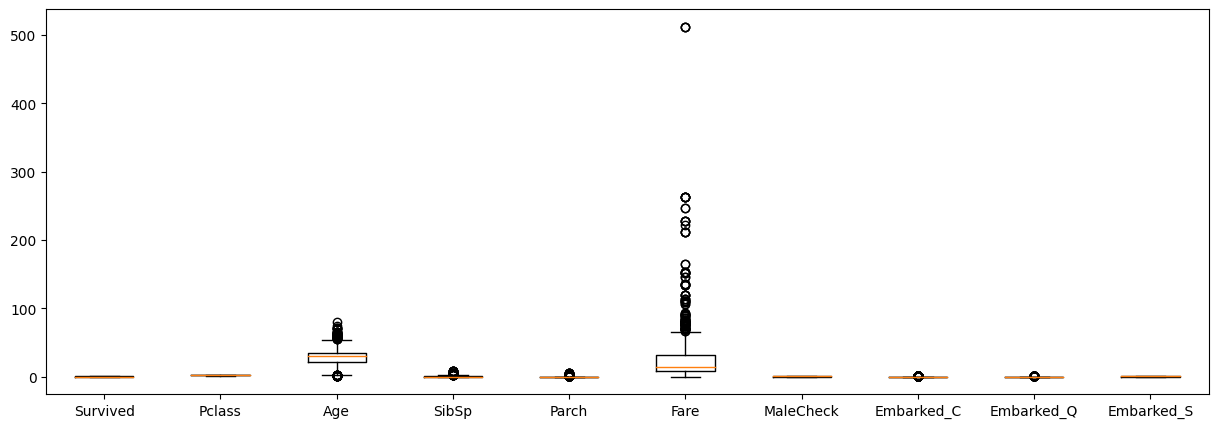

In [349]:
# Visualizando a escala desses dados
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)

plt.show()

In [350]:
# Importando o RobustScaler
from sklearn.preprocessing import RobustScaler

In [351]:
# Criando o scaler
transformer = RobustScaler().fit(treino[['Age','Fare']])

In [352]:
# Fazendo o transformação dos dados
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

In [353]:
# Fazendo para a base de teste
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])

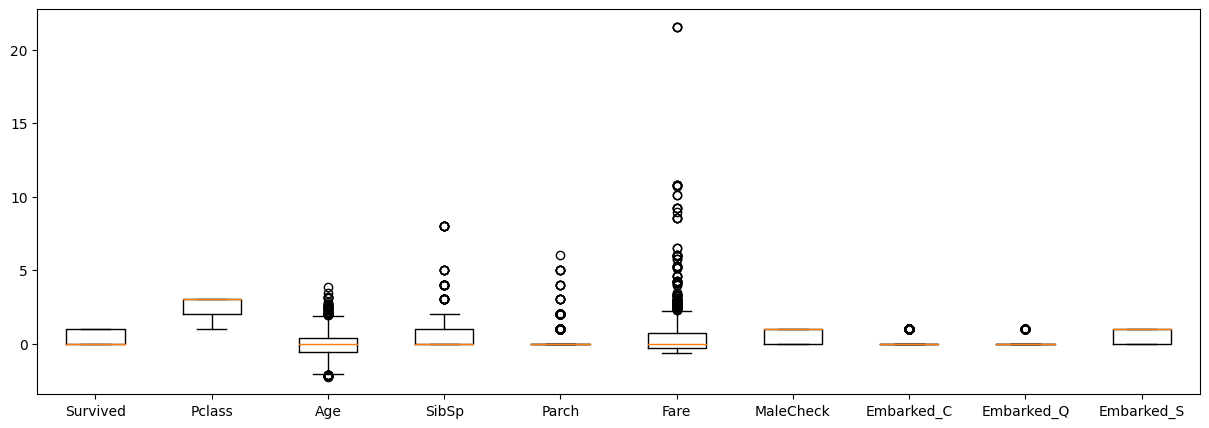

In [354]:
# Visualizando novamente os dados
fig, ax = plt.subplots(figsize=(15,5))

ax.boxplot(treino.iloc[:,1:11])
ax.set_xticks(range(1,treino.iloc[:,1:11].shape[1]+1),treino.iloc[:,1:11].columns)

plt.show()

- Podemos já [utilizar essa base no modelo](#modelo) para verificar o resultado

<a id='familia'></a>
#### Entendendo as colunas SibSp e Parch
- Agora podemos entender as colunas **SibSp** e **Parch**
    - **SibSp**: Nº de irmãos/cônjuges a bordo do Titanic
    - **Parch**: Nº de pais/filhos a bordo do Titanic
- Podemos verificar quantas pessoas sobreviveram em cada um dos valores dessa coluna

In [355]:
# Verificando a sobrevivência para SibSp
SibSp_df = treino.groupby('SibSp')['Survived'].agg(['sum','count','mean']).reset_index()
SibSp_df.columns = ['SibSp','sobrev','total','tx_sobrev']
SibSp_df

,SibSp,sobrev,total,tx_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [356]:
# Verificando a sobrevivência para Parch
Parch_df = treino.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()
Parch_df.columns = ['Parch','sobrev','total','tx_sobrev']
Parch_df

,Parch,sobrev,total,tx_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


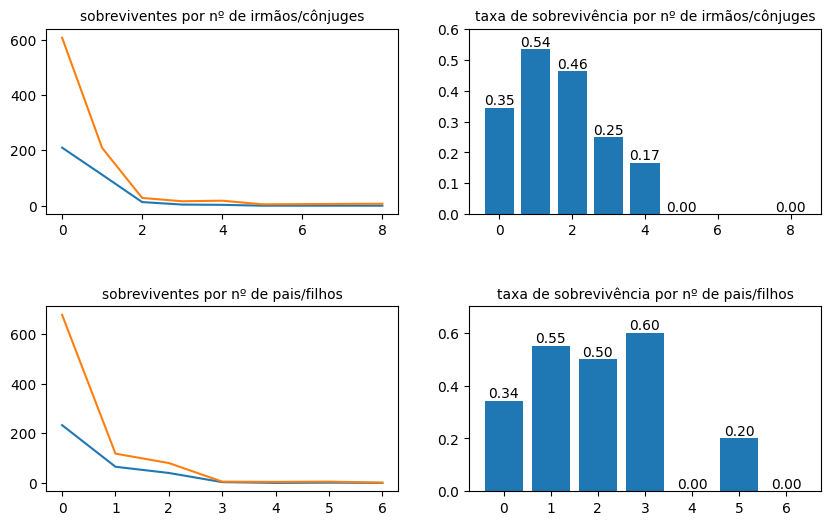

In [357]:
# Visualizando essas informações graficamente
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobrev)
ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)
ax[0,0].set_title('sobreviventes por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.tx_sobrev)
ax[0,1].bar_label(labels1,fmt="%.02f")
ax[0,1].set(ylim=(0,0.6))
ax[0,1].set_title('taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobrev)
ax[1,0].plot(Parch_df.Parch, Parch_df.total)
ax[1,0].set_title('sobreviventes por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.tx_sobrev)
ax[1,1].bar_label(labels2,fmt="%.02f")
ax[1,1].set(ylim=(0,0.7))
ax[1,1].set_title('taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

- **Passageiros viajando sozinho tiveram um menor percentual de sobrevivência**
    - Podemos criar uma nova coluna identificando se o passageiro está viajando sozinho

In [358]:
# Criando uma função para verificar se os dois valores são vazios
def sozinho(a,b):
    if (a == 0 and b == 0):
        return 1
    else:
        return 0

In [359]:
# Aplicando essa função na base de treino
treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

In [360]:
# Verificando os valores nessa coluna
treino.groupby('Sozinho')[['SibSp','Parch']].mean()

,SibSp,Parch
Sozinho,,
0,1.316384,0.960452
1,0.000000,0.000000


In [361]:
# Fazendo o mesmo para a base de teste
teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

- Podemos também **criar uma nova coluna** sendo o **total de familiares a bordo**

In [362]:
# Criando para a base de treino
treino['Familiares'] = treino.SibSp + treino.Parch

In [363]:
# E para a base de teste
teste['Familiares'] = treino.SibSp + treino.Parch

In [364]:
# Verificando a sobrevivência para Familiares
Familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum','count','mean']).reset_index()
Familiares_df.columns = ['Familiares','sobrev','total','tx_sobrev']
Familiares_df

,Familiares,sobrev,total,tx_sobrev
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


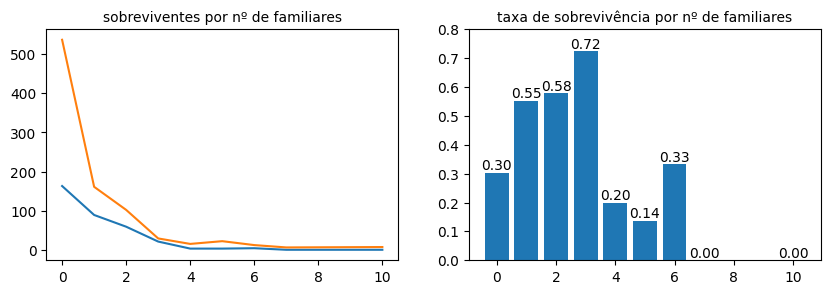

In [365]:
# Visualizando a informação de familiares
fig, ax = plt.subplots(ncols=2,figsize=(10,3))

ax[0].plot(Familiares_df.Familiares, Familiares_df.sobrev)
ax[0].plot(Familiares_df.Familiares, Familiares_df.total)
ax[0].set_title('sobreviventes por nº de familiares', fontsize=10)

labels1 = ax[1].bar(Familiares_df.Familiares, Familiares_df.tx_sobrev)
ax[1].bar_label(labels1,fmt="%.02f")
ax[1].set(ylim=(0,0.8))
ax[1].set_title('taxa de sobrevivência por nº de familiares', fontsize=10)

plt.show()

- Podemos já [utilizar essa base no modelo](#modelo) para verificar o resultado

<a id="f_selection"></a>
#### Selecionando os melhores recursos
- Primeiramente precisamos analisar qual a **correlação entre as variáveis** e verificar se não existem variáveis que estão basicamente "dizendo a mesma coisa"

In [366]:
# Visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
0,1,0,3,-0.592240,1,0,-0.312011,1,0,0,1,0,1
1,2,1,1,0.638529,1,0,2.461242,0,1,0,0,0,1
2,3,1,3,-0.284548,0,0,-0.282777,0,0,0,1,1,0


In [367]:
# Analisando a correlação entre as variáveis
treino.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Embarked_C,Embarked_Q,Embarked_S,Sozinho,Familiares
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022204,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.149683,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.074053,0.135207,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,0.032024,-0.013855,-0.019336,0.179775,-0.248512
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.068734,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.060814,-0.583398,0.783111
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.162184,-0.271832,0.217138
MaleCheck,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.119224,0.303646,-0.200988
Embarked_C,-0.001205,0.168240,-0.243292,0.032024,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.782742,-0.095298,-0.046215
Embarked_Q,-0.033606,0.003650,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.499421,0.086464,-0.058592


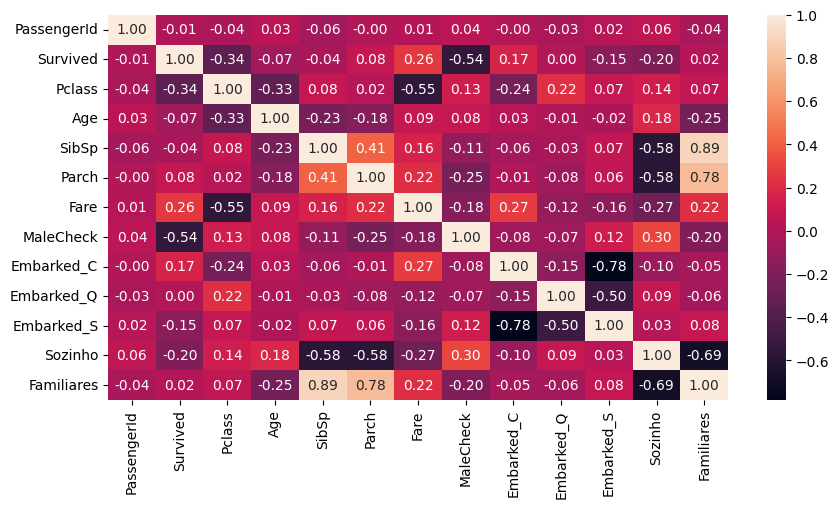

In [368]:
# Tornando a correlação mais visual
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(treino.corr(), annot=True, fmt=".2f")

plt.show()

<a id='PclassFare'></a>
- <font color='green'> Entendendo a relação entre **Pclass e Fare** </font>
  - A princípio podemos de deduzir que tão relação faz sentido, pois normalmente quando maior é a classe da passagem (Pclass: 1st, 2nd, 3rd) mais caro será a tarifa (Fare).

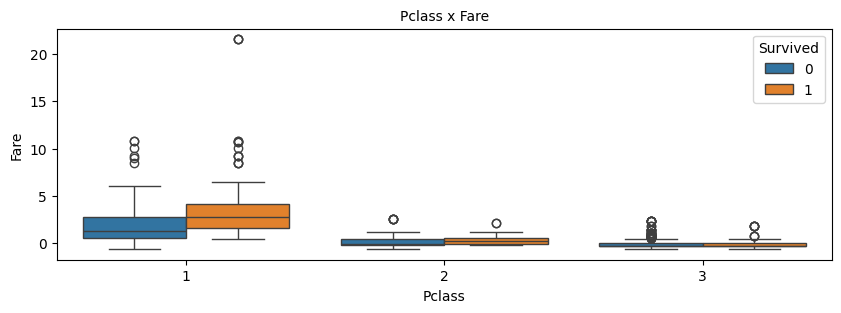

In [369]:
# Visualizando a relação entre essas variáveis
fig, ax = plt.subplots(figsize=(10,3))

sns.boxplot(data=treino,x='Pclass',y='Fare',hue='Survived')
ax.set_title('Pclass x Fare', fontsize=10)

plt.show()

In [370]:
# Verificando a taxa de sobrevivência em cada uma das classes
treino.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [371]:
# Entendendo a relação entre Pclass x Fare
treino.groupby(['Pclass','Survived'])['Fare'].agg(['min','mean','max'])

min      mean        max
Pclass Survived                               
1      0        -0.626005  2.175430  10.764405
       1         0.496977  3.514735  21.562738
2      0        -0.626005  0.214734   2.557247
       1        -0.171255  0.329217   2.189115
3      0        -0.626005 -0.033991   2.386174
       1        -0.626005 -0.032885   1.820802

- Nesse momento pode surgir a pergunta do motivo de termos **pessoas pagando o mesmo preço em classes diferentes**
    - Procurando no Kaggle, [essa resposta](https://www.kaggle.com/questions-and-answers/128215) ajuda a explicar um pouco:


_"Se você conseguiu economizar e guardar todo o seu dinheiro para uma viagem para mudar sua vida e ir para a América, você é uma terceira classe, um imigrante que precisa trazer sua própria comida a bordo e ter em mente como suas provisões se sustentariam. A segunda classe era formada por trabalhadores de colarinho branco que podiam se dar ao luxo de viajar com um pouco de lazer, sem se preocupar com algo tão comum como comida. Primeira classe significa que você nasceu com dinheiro e não precisa sujar as mãos com o trabalho. Eles não eram separados apenas pelo custo, eles também eram separados por onde poderiam ir e o que recebiam."_

- Também tem um link do Reddit que detalha bem essa questão de classe x preço
    - https://www.reddit.com/r/AskHistorians/comments/11dlsn6/why_was_the_cost_of_tickets_on_the_titanic_so/?onetap_auto=true
    - Podemos pensar em direcionar uma **análise relacionando ao preço da cabine**, porém **essa variável possui 77.1% dos valores vazios**

<a id='Embarque'></a>
- <font color='green'> Entendendo sobre as **colunas de embarque** </font>
    - Inicialmente pensamos não existir relação de ordem entre a coluna de embarque, mas pesquisando [nesse artigo](https://pt.wikipedia.org/wiki/RMS_Titanic) percebemos que **existe sim essa correlação**
    
    
_"O Titanic deixou o porto de **Southampton**...Em seguida ele foi para **Cherbourg-Octeville** na França...em sua maioria da primeira classe.O Titanic então rumou para **Queenstown** na Irlanda...principalmente imigrantes da terceira classe que pretendiam tentar a vida nos Estados Unidos."_

In [372]:
# Podemos importar novamente as bases para "recuperar" a coluna de embarque
treino2 = pd.read_csv('/content/titanic/train.csv')
teste2 = pd.read_csv('/content/titanic/test.csv')

treino2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [373]:
# Como temos valores vazios, podemos novamente fazer o tratamento dos dados
treino2['Embarked'] = treino2['Embarked'].fillna('S')

- O que podemos fazer agora é colocar o porto em ordem de embarque (S depois C e depois Q)
    - Podemos fazer isso através do **[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)**

In [374]:
# Realizando a importação

from sklearn.preprocessing import OrdinalEncoder

In [375]:
# Criando o encoder
categorias = ['S','C','Q']

enc = OrdinalEncoder(categories=[categorias],dtype='int32')

In [376]:
# Fazendo o fit com os dados
enc = enc.fit(treino2[['Embarked']])

In [377]:
# Podemos então adicionar essa coluna na base de treino original
treino['Embarked'] = enc.transform(treino2[['Embarked']])

In [378]:
# E fazer o fit com os dados de teste
enc = enc.fit(teste2[['Embarked']])

In [379]:
# E adicionar na base de teste original
teste['Embarked'] = enc.transform(teste2[['Embarked']])

In [380]:
# Agora podemos eliminar as colunas desnecessárias
treino = treino.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
teste = teste.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)

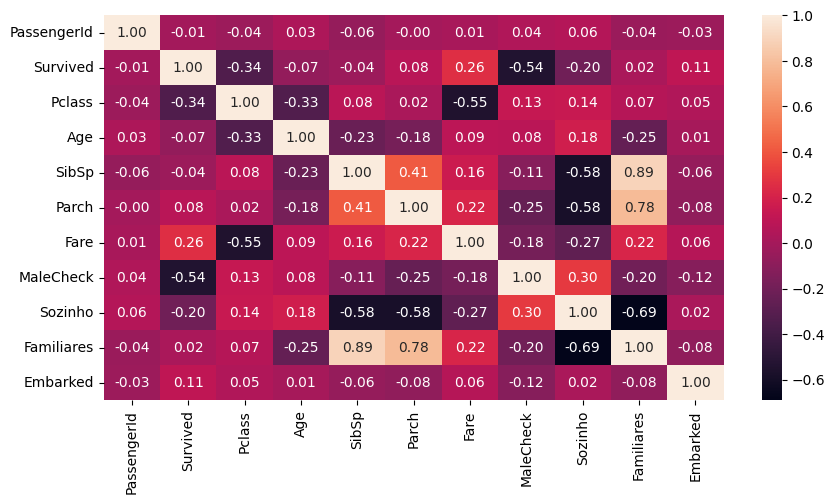

In [381]:
# Visualizando novamente a correlação
fig, ax = plt.subplots(figsize=(10,5))

sns.heatmap(treino.corr(), annot=True, fmt=".2f")

plt.show()

<a id='Familia'></a>
- <font color='green'> Entendendo agora as **colunas de família** </font>
    - Podemos usar a regressão logística e a árvore de classificação para verificar a importância de cada uma dessas colunas

In [382]:
# Separando X e y
X = treino.drop(['PassengerId','Survived'],axis=1)
y = treino.Survived

In [383]:
# Usando a regressão logística nos dados
clf_rl = LogisticRegression(random_state=42,max_iter=1000).fit(X,y)

In [384]:
# Verificando a importância
clf_rl.coef_[0]

array([-1.03314773, -0.49645712, -0.26819737,  0.01690958,  0.04398615,
       -2.5345877 , -0.73233826, -0.25128778,  0.23866778])

In [385]:
# Agora usando a árvore de classificação
clf_ac = tree.DecisionTreeClassifier(random_state=42).fit(X,y)

In [386]:
# Verificando a importância
clf_ac.feature_importances_

array([0.10901775, 0.22826711, 0.01907221, 0.0272942 , 0.23870173,
       0.30933519, 0.00397775, 0.04365035, 0.02068372])

In [387]:
# Criando um DataFrame
imp = pd.DataFrame({
    'colunas': X.columns,
    'reg. log.': clf_rl.coef_[0],
    'arvore': clf_ac.feature_importances_
})

imp

,colunas,reg. log.,arvore
0,Pclass,-1.033148,0.109018
1,Age,-0.496457,0.228267
2,SibSp,-0.268197,0.019072
3,Parch,0.016910,0.027294
4,Fare,0.043986,0.238702
5,MaleCheck,-2.534588,0.309335
6,Sozinho,-0.732338,0.003978
7,Familiares,-0.251288,0.043650
8,Embarked,0.238668,0.020684


In [388]:
# Podemos apenas manter as colunas mais relevantes
treino = treino.drop(['SibSp','Parch'],axis=1)
teste = teste.drop(['SibSp','Parch'],axis=1)


# Usando essa nova base no modelo



In [389]:
# Visualizando a base

treino.head()

,PassengerId,Survived,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,1,0,3,-0.592240,-0.312011,1,0,1,0
1,2,1,1,0.638529,2.461242,0,0,1,1
2,3,1,3,-0.284548,-0.282777,0,1,0,0
3,4,1,1,0.407760,1.673732,0,0,1,0
4,5,0,3,0.407760,-0.277363,1,1,0,0


- Igual visto anteriormente na [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) da análise.

**Árvore de Decisão**

- https://scikit-learn.org/stable/modules/tree.html#classification


**Classificação dos vizinhos mais próximos (KNN)**

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


**Regressão Logística**

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression



Antes de usar os algoritmos, precisamos separar a base de treino em treino e validação. Vamos fazer isso utilizando o train_test_split.

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [390]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [391]:
# Separando a base de treino em X e y
X = treino.drop(['PassengerId','Survived'],axis=1)

y = treino.Survived

In [392]:
# Separando em treino e validação

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)


- Para a **Árvore de Decisão (ad)**

In [393]:
# Fazendo a importação
from sklearn import tree

In [394]:
# Criando o classificador

clf_ad = tree.DecisionTreeClassifier(random_state=42)

In [395]:
# Fazendo o fit com os dados

clf_ad = clf_ad.fit(X_train,y_train)

In [396]:
# Fazendo a previsão

y_pred_ad = clf_ad.predict(X_val)

- **Para a Classificação dos vizinhos mais próximos (KNN)**

In [397]:
# Fazendo importação
from sklearn.neighbors import KNeighborsClassifier

In [398]:
# Criando o classificador

clf_knn = KNeighborsClassifier(n_neighbors=3)

In [399]:
# Fazendo o fit com os dados

clf_knn = clf_knn.fit(X_train,y_train)

In [400]:
# Fazendo a previsão

y_pred_knn = clf_knn.predict(X_val)

- **Para a Regressão Logística (rl)**

In [401]:
# Fazendo importação
from sklearn.linear_model import LogisticRegression

In [402]:
# Criando o classificador

clf_rl = LogisticRegression(random_state=42,max_iter=1000)

In [403]:
# Fazendo o fit com os dados

clf_rl = clf_rl.fit(X_train,y_train)

In [404]:
# Fazendo a previsão

y_pred_rl = clf_rl.predict(X_val)

# Avaliando os modelos da mesma maneira

Para fazer essa análise, podemos usar:

- **Acurácia** (método de avaliação usado na competição):

  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- **Matriz de confusão** (ajuda a visualizar a distribuição dos erros):
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

Lembrando que é importante avaliar o modelo em um conjunto de dados que não foi usado para criar o modelo. Isso é importante para evetarmos o que comulmente é chamado de **Overfitting**
- É quando o modelo aprendeu tão bem as relações existentes no treino, que acabou apenas decorando o que deveria ser feito, e ao receber as informações das variáveis preditoras nos dados de teste, o modelo tenta aplicar as mesmas regras decoradas, porém com dados diferentes esta regra não tem validade, e o desempenho é afetado, perdendo assim a capacidade de **Generalização**.



In [405]:
# Importando
from sklearn.metrics import accuracy_score

In [406]:
# Para a árvore
acuracia_ad = accuracy_score(y_val, y_pred_ad)
print(f'Acúracia Árvore de Decisão: {acuracia_ad * 100:.3f}%')

# Para o knn
acuracia_knn = accuracy_score(y_val, y_pred_knn)
print(f'Acúracia KNN: {acuracia_knn * 100:.3f}%')

# Para a regressão logística
acuracia_rl = accuracy_score(y_val, y_pred_rl)
print(f'Acúracia Regressão Logística: {acuracia_rl * 100:.3f}%')

Acúracia Árvore de Decisão: 76.271%
Acúracia KNN: 78.644%
Acúracia Regressão Logística: 81.017%


- Irei salvar esses valores em um DataFrame para visualizar se houve ou não alguma evolução em comparação a [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb) da análise.

In [ ]:
# Criando um DataFrame (É criado uma unica vez, cuidado com a sobreposição)

#as_df = pd.DataFrame({
# 'modelos': ['Árvore de Decisão','KNN','Regressão Logística'],
#   'inicial': [acuracia_ad,acuracia_knn,acuracia_rl]
#})

#as_df

In [176]:
# Adicionando novas colunas

#as_df['escala'] = [acuracia_ad,acuracia_knn,acuracia_rl]
#as_df['pessoas'] = [acuracia_ad,acuracia_knn,acuracia_rl]
as_df['colunas'] = [acuracia_ad,acuracia_knn,acuracia_rl]

In [177]:
# Visualizando
as_df

,modelos,inicial,escala,pessoas,colunas
0,Árvore de Decisão,0.749153,0.749153,0.735593,0.762712
1,KNN,0.715254,0.800000,0.786441,0.786441
2,Regressão Logística,0.816949,0.816949,0.806780,0.810169


- Avaliando a **Matriz de Confusão**

In [407]:
# Importando
from sklearn.metrics import confusion_matrix

In [408]:
# Para a árvore
matriz_confusao_ad = confusion_matrix(y_val, y_pred_ad)

# Para o knn
matriz_confusao_knn = confusion_matrix(y_val, y_pred_knn)

# Para a regressão logística
matriz_confusao_rl = confusion_matrix(y_val, y_pred_rl)

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Função para o plot

def plot_confusion_matrix(matriz, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(title, fontsize=18)
    plt.xlabel('Previsto', fontsize=16)
    plt.ylabel('Real', fontsize=16)
    plt.show()

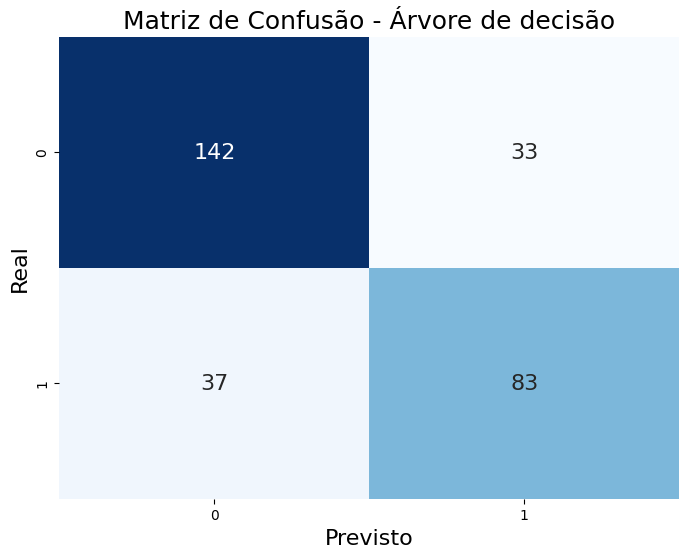

In [410]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_ad, 'Matriz de Confusão - Árvore de decisão')

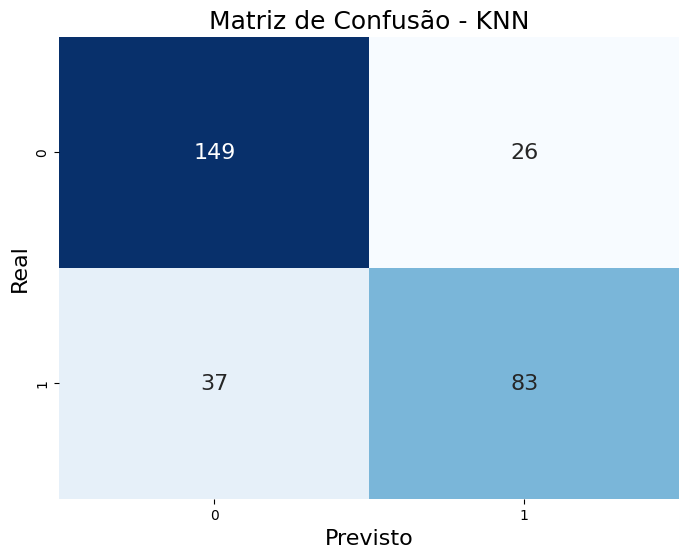

In [411]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_knn, 'Matriz de Confusão - KNN')

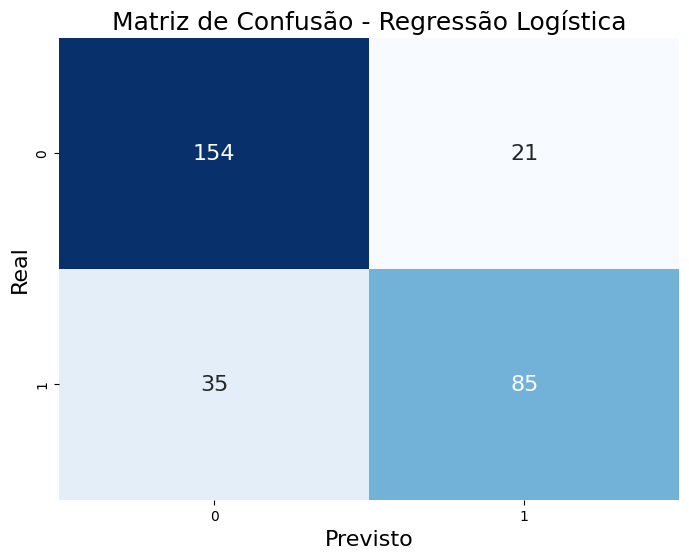

In [412]:
# Plotando as matrizes de confusão
plot_confusion_matrix(matriz_confusao_rl, 'Matriz de Confusão - Regressão Logística')

- Sempre que quisermos, podemos **[voltar](#ajustes)** e continuar fazendo os ajustes necessários na nossa base

## Fazendo a previsão para os dados de teste
- Vamos usar o modelo com melhor precisão para fazer o predict na base de teste

In [415]:
# Visualizando a base de teste
X_train.head(3)

,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
6,1,1.869299,1.620136,1,1,0,0
718,3,0.000000,0.045293,1,1,0,2
685,2,-0.361471,1.174771,1,0,3,1


In [416]:
# Visualizando a base de teste
teste.head(3)

,PassengerId,Pclass,Age,Fare,MaleCheck,Sozinho,Familiares,Embarked
0,892,3,0.331562,-0.280670,1,1,1,2
1,893,3,1.311954,-0.315800,0,0,1,0
2,894,2,2.488424,-0.201943,1,1,0,2


In [417]:
# Para a base de teste ser igual a base de treino, precisamos eliminar a coluna de id
X_teste = teste.drop('PassengerId',axis=1)

In [418]:
# Utilizando a regressão logística na base de teste
y_pred = clf_rl.predict(X_teste)

In [419]:
# Criando uma nova coluna com a previsão na base de teste
teste['Survived'] = y_pred

In [420]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste[['PassengerId','Survived']]

In [421]:
# Exportando para um csv
base_envio.to_csv('resultados_completo.csv',index=False)

## Algumas conclusões que obtivemos

- Ao tratar a **escala** dos dados tivemos uma melhora no modelo que usava KNN
  - Isso, pois o KNN usa medidas de distância para seus cálculos, logo faz sentido que ele tenha um melhor resultado com dados normalizados.
- Podemos observar também que as mudanças realizadas com as colunas ***'SibSp'*** e ***'Parch'*** não ajudou nenhum dos modelos utilizados, porém só iriamos descobrir se de fato elas poderiam ajudar se tivessemos testado, assim como foi feito.

- E por fim, podemos perceber que as alterações feitas nas colunas (**'Embarked'**) e a retirada das ***'SibSp'*** e ***'Parch'***  trouxe um pequeno aumento do na acurácia dos dados de treinamento, como pode ser visto abaixo.

  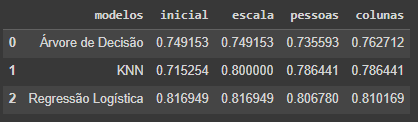

# Acurácia Final Obtida
- Abaixo está a acurácia final obtida de acordo com os tratamentos e modelos utilizados neste projeto. Caso queira ver o resultado obtido na primeira análise feita sobre esse dataset, clique no link a seguir: [**parte 1**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte1.ipynb) e [**parte 2**](https://github.com/pedrohspassos/predicted-survivors-titanic/blob/main/analise_titanic_parte2.ipynb)

- Este projeto é a **Parte 3** de uma série contínua. Em cada parte, vamos tentar melhorar essa acurácia final, aplicando diferentes ações, modelos e tratamentos no dataset, com o objetivo de aumentar a precisão dos resultados finais.

- Como tivemos **duas abordagens** que tiveram bons resultados, irei submeter    
  - arquivo onde foi feito o tratamento na escala, com o modelo de regressão logística

 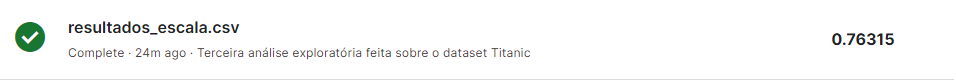
  - arquivo onde foi feito todos os tratamento das colunas ditos anteriormente, também com o modelo de regressão logística

 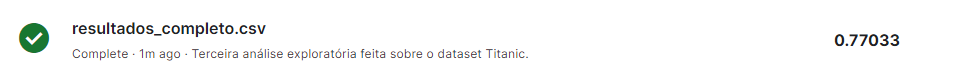

- Logo, podemos ver que nos dados de **teste**, o uso de todos os passos para o tratamento do DataSet se saiu melhor, em comparação com apenas o ajuste de escala.